<a href="https://colab.research.google.com/github/EricaDesirae/eportfolio-SECB4313/blob/main/Exercise_Heart_Disease_EricaDesirae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#Confusion Matrix Visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
# Set the data path for data set and model location
dataset_dir = "/content/gdrive/My Drive/Exercise SECB4313/"
model_loc = "/content/gdrive/My Drive/Exercise SECB4313/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir + 'heart.csv')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['heart.csv']


In [59]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

data.head() #display first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

# The purpose of setting categorical variables in a dataset and then casting them to the object data type
# using the `astype()` function is to treat them as discrete categories rather than numerical values.
# This can help in performing operations like grouping, sorting, and analysis more accurately and efficiently.

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [61]:
### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function
# this one is like using checkboxes
data = pd.get_dummies(data, drop_first=True)

<ipython-input-61-6a5a57fc670b>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-61-6a5a57fc670b>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-61-6a5a57fc670b>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-61-6a5a57fc670b>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-61-6a5a57fc670b>:3: FutureWarning: In a future version, t

In [63]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values #take target value
y = y.reshape(y.shape[0],1) #reshape y array into 1 dimension
x = data.drop(['target'],axis=1)#drop 'target' in x data

### Answer ###
### Line 3 extracts the target variable from the dataset `data` and assigns its values to the variable `y`.
### Line 4 reshapes the `y` array into a single dimension.
### Line 5 removes the column 'target' from the dataset `data` and assigns the resulting DataFrame to the variable `x`.

### To print the shape of `x` and `y`, you can use the `.shape` attribute.
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 21)
Shape of y: (303, 1)


In [64]:
y.size

303

In [65]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

# Create a simple dataset
data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset:')
print(data)

# Normalize data (range 0 - 1)
minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
print(data_norm)

Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
     A    B    C
0  0.0  0.0  0.0
1  0.5  0.5  0.5
2  1.0  1.0  1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [66]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()


# Description
# The data has become within the range of 0-1, this will prevent oevrfitting
# and have a higher accuracy

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 21)
(55, 21)
(31, 21)


In [68]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()


### Answer ###
### In a neural network with layers of 64, 32, and 1 neurons, employing the Sequential() function and using softmax and sigmoid activation functions,
### each layer serves a distinct purpose. The initial layer, with 64 neurons, acts as the input layer, processing input data with ReLU activation.
### The subsequent layer, featuring 32 neurons, serves as a hidden layer, adding complexity with ReLU activation. The final layer, consisting of a single neuron,
### serves as the output layer, producing the final output using a sigmoid activation function, suitable for binary classification tasks.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

#model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])


### Answer ###
### The code compiles a neural network model using mean squared error as the loss function for regression tasks,
### the Adam optimizer with a learning rate of 0.01 for efficient weight adjustment, and accuracy as the metric
### to evaluate the model's performance in classification tasks.

In [70]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 1s 15ms/step - loss: 0.2496 - acc: 0.5300 - val_loss: 0.2474 - val_acc: 0.5455
Epoch 2/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2466 - acc: 0.5438 - val_loss: 0.2445 - val_acc: 0.5455
Epoch 3/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2425 - acc: 0.5438 - val_loss: 0.2370 - val_acc: 0.5455
Epoch 4/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2329 - acc: 0.5438 - val_loss: 0.2225 - val_acc: 0.6364
Epoch 5/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2184 - acc: 0.7972 - val_loss: 0.2020 - val_acc: 0.8545
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1970 - acc: 0.8433 - val_loss: 0.1825 - val_acc: 0.8545
Epoch 7/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1757 - acc: 0.8479 - val_loss: 0.1574 - val_acc: 0.8909
Epoch 8/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

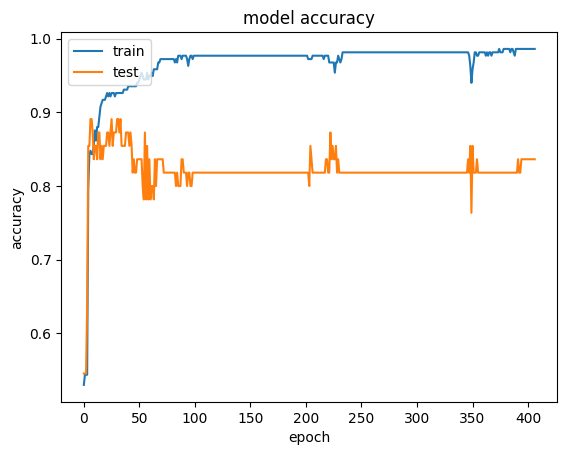

In [71]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

### Answer ###
### The plot visualizes the model's accuracy over training epochs,
### with the x-axis representing the number of training epochs and the y-axis representing accuracy.
### It displays two lines: one for training accuracy (`output.history['acc']`) and one for validation accuracy (`output.history['val_acc']`).
### This helps monitor the model's performance and detect potential overfitting or underfitting during training.

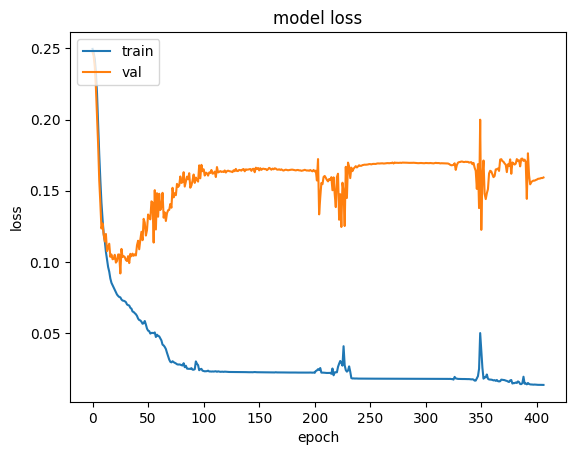

In [72]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [73]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

### Answer ###
### The purpose of evaluating the model on the test dataset is to
### ensures it can generalize to new data and provides an unbiased assessment of its performance beyond the training set.
### It helps detect overfitting and ensures the model has learned meaningful patterns from the training data,
### validating its effectiveness in real-world scenarios.

1/1 [==============================] - 0s 20ms/step - loss: 0.1921 - acc: 0.8065

acc: 80.65%
loss: 0.19


In [74]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 59ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result:

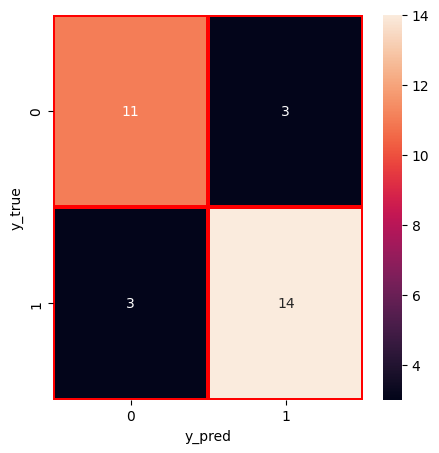


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [75]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))


### Answer Question 15 ###
### A Confusion Matrix summarizes a classification model's predictions against actual data.
### It comprises True Positives (correct positive predictions), False Positives (incorrect positive predictions),
### False Negatives (incorrect negative predictions), and True Negatives (correct negative predictions).
### It helps assess model performance by quantifying its strengths and weaknesses, aiding in the calculation of metrics like accuracy and precision.

############################################################################################################################################################

### Answer Question 16 ###
### The classification report summarizes the model's performance for each class.
### Precision indicates the accuracy of positive predictions, with class 0 at 0.79.
### Recall measures the model's ability to identify actual positives, also at 0.79 for class 0.
### The F1-score combines precision and recall, with class 0 at 0.79.
### Support denotes the number of instances for each class, with class 0 having 14 instances.
### The overall accuracy is 0.81, indicating 81% correct predictions.
### The report offers insights into the model's performance across classes and considers class imbalances.